In [2]:
import numpy as np
import csv
import pandas as pd
import nltk
#from nltk.sentiment import util
from matplotlib import pyplot as plt

%matplotlib inline

dataframe_comments = pd.read_csv('reddit-suspicious-accounts/data/comments.csv', encoding='utf-8')
#dataframe_comments.head()

#% of posts and comments at subreddit, maybe per account per subreddit
print(dataframe_comments['body'][0])
dataframe_comments.head()

A hard look at training and tactics" = They will be sent more $$$ for "training"


,fullname,archived,author.name,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,link_url,name,num_comments,parent_id,permalink,score,stickied,subreddit.display_name_prefixed,subreddit_type,ups
0,t1_d687zh5,True,BlackToLive,NaN,"A hard look at training and tactics"" = They wi...",0,1.470604e+09,NaN,0,False,...,http://www.reuters.com/article/us-usa-police-c...,t1_d687zh5,119,t3_4wkn7m,/r/Bad_Cop_No_Donut/comments/4wkn7m/chicago_po...,1,False,r/Bad_Cop_No_Donut,public,1
1,t1_d5wqzhx,True,BlackToLive,NaN,They deserve all of the hate,0,1.469847e+09,NaN,0,False,...,http://reason.com/blog/2016/07/28/pine-bluff-c...,t1_d5wqzhx,96,t3_4v5xpc,/r/Bad_Cop_No_Donut/comments/4v5xpc/arkansas_p...,1,False,r/Bad_Cop_No_Donut,public,1
2,t1_d5qvqfw,True,BlackToLive,NaN,"I guess that's what they mean when say ""I don'...",0,1.469498e+09,NaN,0,False,...,http://countercurrentnews.com/2016/07/no-charg...,t1_d5qvqfw,210,t1_d5qeyrw,/r/Bad_Cop_No_Donut/comments/4uiezg/no_charges...,1,False,r/Bad_Cop_No_Donut,public,1
3,t1_d5quz9y,True,BlackToLive,NaN,"It's never too late for them, It's never too c...",0,1.469497e+09,NaN,0,False,...,http://www.opposingviews.com/i/society/police-...,t1_d5quz9y,18,t3_4uicjv,/r/Bad_Cop_No_Donut/comments/4uicjv/police_off...,1,False,r/Bad_Cop_No_Donut,public,1
4,t1_d565ls1,True,BlackToLive,NaN,https://petitions.whitehouse.gov//petition/pet...,0,1.468114e+09,NaN,0,False,...,http://www.thelibertyconservative.com/favor-po...,t1_d565ls1,12,t1_d55o1gr,/r/Good_Cop_Free_Donut/comments/4s0s3j/you_can...,1,False,r/Good_Cop_Free_Donut,public,1


In [3]:
#Tokenizes Comments for Sentiment analysis
tokenized_comments = []
for itr in dataframe_comments.index.values:
    tokenized_comments.append(nltk.word_tokenize(dataframe_comments['body'][itr], language = 'English', preserve_line = 'True'))

#lc_tokenized_comments = []
#for item in tokenized_comments:
#    [x.lower() for x in item]
#print(tokenized_comments[:])
print(len(tokenized_comments))

6711


In [4]:
#Comments Containing the words Russia or russian
russia_reference = []
russian_reference = []
for itr in tokenized_comments:
    for num in range(0, len(itr)):
        if itr[num] == 'Russia' or itr[num] == 'russia': 
            russia_reference.append(itr)
        if itr[num] == 'Russian' or itr[num] == 'russian':
            russian_reference.append(itr)

print(len(russia_reference))
print(len(russian_reference))

41
40


In [5]:
#New dataframe with controveriality > 0 printing comments
controversial_comments = dataframe_comments.query('controversiality > 0').copy()
#print(controversial_comments['body'][0])
for num in controversial_comments.index.values:
    print('num = ', num)
    print(controversial_comments['body'][num], "\n")
#controversial_comments.head()

num =  5
By submitting to an independent, non-profit community, the authors volunteered on a Good Samaritan basis to spread wokeness 

num =  10
Well, in this country it's either you are top executive and can get away with anything or you are a common American and can get get in jail literally for anything.  

num =  11
> large-scale military exercises near Russia

Okay, you tease the bear, the bear is likely to strike back. What's the point of whining about Russian aggression then? 

num =  37
That's the best I have seen today!
crying with the guy! 

num =  93
This is a pro-BitcoinCash article hosted on bitcoin.com, which is a URL that was recently bought by the creator and owner of a shit ton of BitcoinCash (NOT Bitcoin). The official website of Bitcoin is bitcoin.org. This is literal propaganda. An advertisement at best. 

num =  230
iPhones. 

num =  306
Choose what you are going to do. 

A: Take measures to stop the ever raising influx of 'volunteers' to ISIS. 

B: Import even mor

num =  6621
Americunts.  

num =  6624
DDoS. EA I guess :p 

num =  6633
Dirty scum. 

num =  6654
Fake. 
Usually US cops just kill people.  

num =  6680
Falkland Islands, Kosovo.

Double standards.
 

num =  6685
/r/pcmasterrace :p 

num =  6687
Too old, too young. 



In [6]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

#nltk.download()
n_instances = 100
subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]
len(subj_docs), len(obj_docs)

#n_instances = len(dataframe_comments)
#subj_docs = []

#nltk.sentiment.util.demo_liu_hu_lexicon(sentence, plot=False)
#sentiment_of_comments = nltk.sentiment.util.demo_liu_hu_lexicon(dataframe_comments['body'][0], plot=True)

#for itr in dataframe_comments.index.values:
#    tokenized_comments.append(nltk.sentiment.util.demo_liu_hu_lexicon(dataframe_comments['body'][itr], plot=False)
#print(sentiment_of_comments[0])

C:\Users\Brett\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


(100, 100)

In [7]:
'''We separately split subjective and objective instances to keep a 
   balanced uniform class distribution in both train and test sets.'''

train_subj_docs = subj_docs[:80]
test_subj_docs = subj_docs[80:100]
train_obj_docs = obj_docs[:80]
test_obj_docs = obj_docs[80:100]
training_docs = train_subj_docs+train_obj_docs
testing_docs = test_subj_docs+test_obj_docs

#Reddit Comments
n_instances = len(tokenized_comments)

subj_docs = [(sent, 'subj') for sent in subjectivity.sents(categories='subj')[:n_instances]]
obj_docs = [(sent, 'obj') for sent in subjectivity.sents(categories='obj')[:n_instances]]

train_set_size = 4*(n_instances/5) #80%
test_set_size = (n_instances/5) #20%

train_subj_docs = tokenized_comments[:train_set_size]
test_subj_docs = tokenized_comments

sentim_analyzer = SentimentAnalyzer()
all_words_neg = sentim_analyzer.all_words([mark_negation(doc) for doc in training_docs])

'''We use simple unigram word features, handling negation:'''

unigram_feats = sentim_analyzer.unigram_word_feats(all_words_neg, min_freq=4)
len(unigram_feats)
sentim_analyzer.add_feat_extractor(extract_unigram_feats, unigrams=unigram_feats)

'''We apply features to obtain a feature-value representation of our datasets:'''

training_set = sentim_analyzer.apply_features(training_docs)
test_set = sentim_analyzer.apply_features(testing_docs)

'''We can now train our classifier on the training set, and subsequently output the evaluation results:'''

trainer = NaiveBayesClassifier.train
classifier = sentim_analyzer.train(trainer, training_set)
for key,value in sorted(sentim_analyzer.evaluate(test_set).items()):
    print('{0}: {1}'.format(key, value))

TypeError: slice indices must be integers or None or have an __index__ method

In [ ]:
dataframe_submissions = pd.read_csv('reddit-suspicious-accounts/data/submissions.csv', encoding='utf-8')
dataframe_submissions.head()

In [8]:
dataframe_users = pd.read_csv('reddit-suspicious-accounts/data/users.csv', encoding='utf-8')
dataframe_users.head()

,fullname,comment_karma,created_utc,has_subscribed,has_verified_email,icon_img,id,is_employee,is_gold,is_mod,link_karma,name
0,t2_z919g,-7,1.467681e+09,True,True,https://www.redditstatic.com/avatars/avatar_de...,z919g,False,False,False,1,BlackToLive
1,t2_nhk4d,-5,1.431683e+09,False,False,https://www.redditstatic.com/avatars/avatar_de...,nhk4d,False,False,False,1,FaurnFlamebreaker
2,t2_r8rca,-4,1.445054e+09,True,False,https://www.redditstatic.com/avatars/avatar_de...,r8rca,False,False,False,1,Bill_Jonson
3,t2_nhml3,0,1.431694e+09,False,False,https://www.redditstatic.com/avatars/avatar_de...,nhml3,False,False,False,1,PurebringerOghmagra
4,t2_qidqv,-2,1.442424e+09,True,False,https://www.redditstatic.com/avatars/avatar_de...,qidqv,False,False,False,1,Clawisma


In [9]:
'''Tokenize Body of Comments for Sentament Analysis'''


'Tokenize Body of Comments for Sentament Analysis'

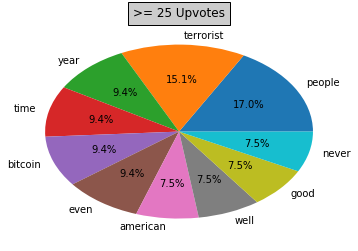

['haha', 'lol', 'lmao', 'rofl']


In [10]:
'''Plot top 10 most common words in upvoted comments'''
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import Counter
import string

#Insignificant word filter
stopwords = stopwords.words('english') #Insignificant word filter
nonImportant = ['wa', 'one', 'like', 'dont', 'want', 'make', 'would', 'thats', 'think', 'really', 'way', \
    'get', 'im', 'u']
stopwords.extend(nonImportant)
lemmatizer = WordNetLemmatizer() #Lemmatizer instance
upvoted_comments = dataframe_comments.query('ups >= 25').copy() #Gather comments with 10 or more upvotes
tokenized_comments = [] #Tokenized comments

#Tokenize each comment
for itr in upvoted_comments.index.values:
    lowercased = upvoted_comments['body'][itr].lower() #Lowercase all strings
    #Strip punctuation
    for punct in string.punctuation:
        lowercased = lowercased.replace(punct, "")
    tokenized_comments.append(nltk.word_tokenize(lowercased, language = 'English'))

#Lemmatize each word
for index in range(0, len(tokenized_comments)):
    for w in range(0, len(tokenized_comments[index])):
        tokenized_comments[index][w] = lemmatizer.lemmatize(tokenized_comments[index][w])
        
#Filter out insignificant words
for i in range(0, len(tokenized_comments)):
    tokenized_comments[i] = [word for word in tokenized_comments[i] if word not in stopwords]

#Find counts of all words
upvote_c = Counter()
for lyst in tokenized_comments:
    for werd in lyst:
        upvote_c[werd] += 1

top_upvote = upvote_c.most_common(10) #Get top 10 most frequent words

#Plot in pie chart
plt.pie([num[1] for num in top_upvote], labels = [w[0] for w in top_upvote], autopct = '%1.1f%%')
plt.title(">= 25 Upvotes", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

'''
testw = ['haha', 'lol', 'lmao', 'rofl']
testt = []
for i in range(0, len(testw)):
    testt.append(nltk.word_tokenize(testw[i], language = 'English'))
for i in range(0, len(testt)):
    testt[i] = lemmatizer.lemmatize(testt[i][0])
print(testt)
'''

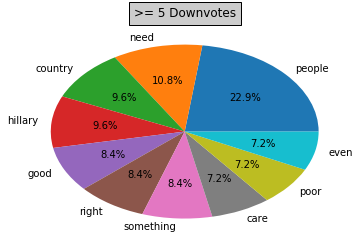

In [11]:
'''Plot top 10 most common words in downvoted comments'''
downvoted_comments = dataframe_comments.query('ups <= -5').copy() #Gather comments with 5 or more downvotes
tokenized_comments = [] #Tokenized comments

#Tokenize each comment
for itr in downvoted_comments.index.values:
    lowercased = downvoted_comments['body'][itr].lower() #Lowercase all strings
    #Strip punctuation
    for punct in string.punctuation:
        lowercased = lowercased.replace(punct, "")
    tokenized_comments.append(nltk.word_tokenize(lowercased, language = 'English'))

#Lemmatize each word
for index in range(0, len(tokenized_comments)):
    for w in range(0, len(tokenized_comments[index])):
        tokenized_comments[index][w] = lemmatizer.lemmatize(tokenized_comments[index][w])
        
#Filter out insignificant words
for i in range(0, len(tokenized_comments)):
    tokenized_comments[i] = [word for word in tokenized_comments[i] if word not in stopwords]

#Find counts of all words
downvote_c = Counter()
for lyst in tokenized_comments:
    for werd in lyst:
        downvote_c[werd] += 1
        
top_downvote = downvote_c.most_common(10) #Get top 10 most frequent words

#Plot in pie chart
plt.pie([num[1] for num in top_downvote], labels = [w[0] for w in top_downvote], autopct = '%1.1f%%')
plt.title(">= 5 Downvotes", bbox={'facecolor':'0.8', 'pad':5})
plt.show()

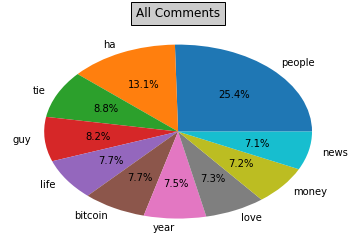

<Text: A hard look at training and tactics ''...>


AttributeError: 'tuple' object has no attribute 'lower'

In [24]:
'''Plot top 10 most common words in all comments'''
from nltk.text import Text

tokenized_comments = []

fullTextString = ''
for itr in dataframe_comments.index.values:
    fullTextString = fullTextString + dataframe_comments['body'][itr]
#print(fullTextString)

#Remove more words that don't offer much value
noValue = ['know', 'good', '’', 'need', 'even', 'time', 'right', 'thing', 'much', \
    'see', 'look', 'well', 'also', 'still', 'say', 'great', 'go', 'never', 'day', \
    'cant', 'could']
stopwords.extend(noValue)

#Tokenize each comment
for itr in dataframe_comments.index.values:
    lowercased = dataframe_comments['body'][itr].lower() #Lowercase all strings
    #Strip punctuation
    for punct in string.punctuation:
        lowercased = lowercased.replace(punct, "")
    tokenized_comments.append(nltk.word_tokenize(lowercased, language = 'English'))
   
    
#Lemmatize each word
for index in range(0, len(tokenized_comments)):
    for w in range(0, len(tokenized_comments[index])):
        tokenized_comments[index][w] = lemmatizer.lemmatize(tokenized_comments[index][w])
        
        #Modify this string to gather context for word use
        #if 'people' == tokenized_comments[index][w]:
            #print(tokenized_comments[index])

'''
Context List: All Words:
tie - cryptocurrency promoting || people - generalizing groups of people
'''
#Filter out insignificant words
for i in range(0, len(tokenized_comments)):
    tokenized_comments[i] = [word for word in tokenized_comments[i] if word not in stopwords]

#Find counts of all words
c = Counter()
for lyst in tokenized_comments:
    for werd in lyst:
        c[werd] += 1
        
top = c.most_common(10) #Get top 10 most frequent words

#for i ind in range(0, len(tokenized_comments)):
    #if [top_word[0] for top_word[0] in top] in token_comments:
        
#Plot in pie chart
plt.pie([num[1] for num in top], labels = [w[0] for w in top], autopct = '%1.1f%%')
plt.title("All Comments", bbox={'facecolor':'0.8', 'pad':5})
plt.show()


fullTextTokens = nltk.word_tokenize(fullTextString)
textList = Text(fullTextTokens)
print(textList)
textList.concordance(top[0])

In [13]:
'''Gather subreddit statistics'''
origSubreddit = Counter()

for itr in dataframe_comments.index.values:
    sub = dataframe_comments['subreddit.display_name_prefixed'][itr]
    origSubreddit[sub] += 1

print(origSubreddit)
topSubs = origSubreddit.most_common(10)
print(topSubs)
    

Counter({'r/AskReddit': 792, 'r/CryptoCurrency': 581, 'r/worldnews': 269, 'r/Bad_Cop_No_Donut': 221, 'r/politics': 199, 'r/news': 199, 'r/funny': 192, 'r/newzealand': 174, 'r/pcmasterrace': 158, 'r/Bitcoin': 151, 'r/aww': 139, 'r/pics': 92, 'r/gifs': 78, 'r/Steam': 75, 'r/GlobalOffensive': 72, 'r/btc': 66, 'r/csgobetting': 61, 'r/The_Donald': 60, 'r/Jokes': 59, 'r/CryptoCurrencies': 57, 'r/Conservative': 57, 'r/Showerthoughts': 55, 'r/videos': 53, 'r/linux': 51, 'r/altcoin': 45, 'r/nottheonion': 41, 'r/randomactsofcsgo': 39, 'r/BlockChain': 37, 'r/gaming': 36, 'r/FemBoys': 36, 'r/Sissies': 35, 'r/POLITIC': 35, 'r/mildlyinteresting': 32, 'r/CryptoMarkets': 31, 'r/ethtrader': 31, 'r/watchpeopledie': 30, 'r/GGCrypto': 29, 'r/Ripple': 29, 'r/PoliticalDiscussion': 29, 'r/ethereum': 28, 'r/ftm': 27, 'r/racism': 27, 'r/todayilearned': 26, 'r/BitcoinAll': 25, 'r/litecoin': 25, 'r/gonewild': 25, 'r/Iota': 24, 'r/icocrypto': 24, 'r/copwatch': 24, 'r/MURICA': 22, 'r/eu4': 21, 'r/Police_v_Video': 